In [31]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
#from xgboost import XGBClassifier
#from lightgbm import LGBMClassifier
#from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
from numpy import set_printoptions
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
#from sklearn.externals

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# importing files
df=pd.read_csv("C:/Users/MY PC/Documents/workspace/Crop_recommendation.csv")
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
df.shape

(2200, 8)

In [5]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
N,2200.0,50.551818,36.917334,0.000000,21.000000,37.000000,84.250000,140.000000
P,2200.0,53.362727,32.985883,5.000000,28.000000,51.000000,68.000000,145.000000
K,2200.0,48.149091,50.647931,5.000000,20.000000,32.000000,49.000000,205.000000
temperature,2200.0,25.616244,5.063749,8.825675,22.769375,25.598693,28.561654,43.675493
humidity,2200.0,71.481779,22.263812,14.258040,60.261953,80.473146,89.948771,99.981876
ph,2200.0,6.469480,0.773938,3.504752,5.971693,6.425045,6.923643,9.935091
rainfall,2200.0,103.463655,54.958389,20.211267,64.551686,94.867624,124.267508,298.560117


In [8]:
df.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [9]:
df.keys()

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [10]:
df.label.unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [11]:
df.label.nunique()

22

In [12]:
df.label.value_counts()

watermelon     100
mothbeans      100
coffee         100
maize          100
pigeonpeas     100
rice           100
chickpea       100
papaya         100
grapes         100
mango          100
blackgram      100
mungbean       100
apple          100
jute           100
coconut        100
lentil         100
muskmelon      100
cotton         100
kidneybeans    100
pomegranate    100
banana         100
orange         100
Name: label, dtype: int64

# Data Exploratory Analysis

<AxesSubplot:>

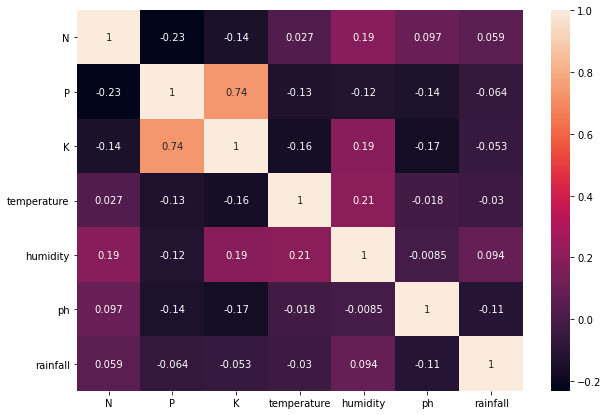

In [13]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True)

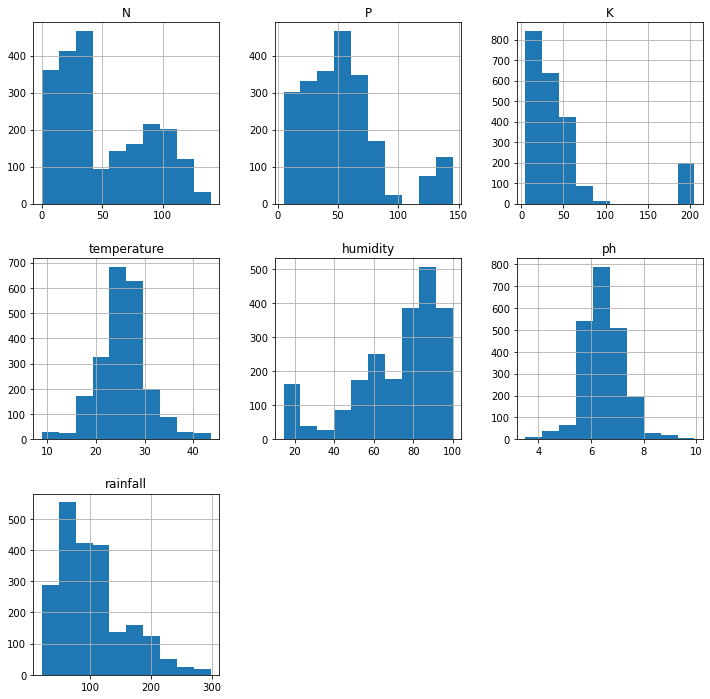

In [14]:
df.hist(figsize=(12,12));

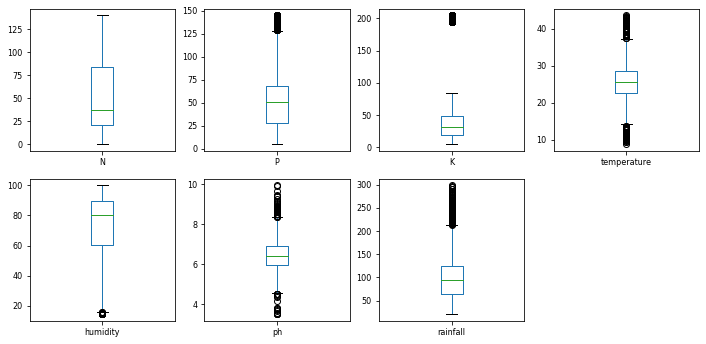

In [15]:
df.plot(kind='box', subplots=True,layout=(4,4), fontsize=8, figsize=(12,12));

# Data Modelling

In [27]:
# splitting data
x=df.drop('label', axis=1)
y=df['label']

In [29]:
# Train and Test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3,random_state=7,shuffle=True)

# Pipeline Model Prediction

In [36]:
pipe_lr=Pipeline(steps=[('myscaler', StandardScaler()),
 ('mypca',PCA(n_components=7)),
 ('lr_ multi',LogisticRegression())])

pipe_lda=Pipeline(steps=[('myscaler', StandardScaler()),
 ('mypca',PCA(n_components=7)),
 ('lr_ multi',LinearDiscriminantAnalysis())])

pipelr=[pipe_lr,pipe_lda]
pipe_dict={0:'Logisticregression',1:'LinearDiscriminantAnalysis'}

for pipe in pipelr:
    pipe.fit(x_train,y_train) 
for i, model in enumerate(pipelr):
    print('{} test accuracy: {}'. format(pipe_dict[i], model.score(x_test,y_test)))


Logisticregression test accuracy: 0.9696969696969697
LinearDiscriminantAnalysis test accuracy: 0.9621212121212122


# Random Forest Classifier

In [38]:
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree

In [40]:
# Initialzing empty lists to append all model's name and corresponding name
acc = []
model = []

In [42]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(x_train,y_train)

predicted_values = RF.predict(x_test)

x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

RF's Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        27
      banana       1.00      1.00      1.00        31
   blackgram       1.00      0.97      0.99        36
    chickpea       1.00      1.00      1.00        27
     coconut       1.00      1.00      1.00        30
      coffee       1.00      1.00      1.00        35
      cotton       1.00      1.00      1.00        27
      grapes       1.00      1.00      1.00        25
        jute       0.93      0.96      0.95        28
 kidneybeans       1.00      1.00      1.00        38
      lentil       0.97      0.97      0.97        31
       maize       0.97      1.00      0.98        30
       mango       1.00      1.00      1.00        32
   mothbeans       0.97      0.97      0.97        32
    mungbean       1.00      1.00      1.00        32
   muskmelon       1.00      1.00      1.00        27
      orange       1.00      1.00      1.00 

In [50]:
#Saving a Model
import joblib
joblib.dump(RandomForestClassifier,'crop_predict.pkl')

['crop_predict.pkl']

In [49]:
from __future__ import print_function
import pickle
# Dump the trained Naive Bayes classifier with Pickle
RF_pkl_filename = 'C:/Users/MY PC/Documents/workspace/models/RandomForest.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/MY PC/Documents/workspace/models/RandomForest.pkl'